In [194]:
import itk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [195]:
dim = 2
ImageType = itk.Image[itk.F, dim]
TransformType = itk.AffineTransform[itk.D,dim]
OptimizerType = itk.ExhaustiveOptimizer
MetricType = itk.MutualInformationImageToImageMetric[ImageType, ImageType]
RegistrationType = itk.ImageRegistrationMethod[ImageType, ImageType]
InterpolatorType = itk.LinearInterpolateImageFunction[ImageType, itk.D]

In [196]:
fixed_img = itk.imread('fixed.png', itk.F)
moving_img = itk.imread('moving.png', itk.F)

In [197]:
transform = TransformType.New()
metric = MetricType.New()
optimizer = OptimizerType.New()
registrar = RegistrationType.New()
interpolator = InterpolatorType.New()

In [198]:
metric.SetNumberOfSpatialSamples(100)
metric.SetFixedImageStandardDeviation(0.4)
metric.SetMovingImageStandardDeviation(0.4)

In [199]:
optimizer.SetNumberOfSteps([0,0,0,0,20,20])

# Initialize scales and set back to optimizer
scales = optimizer.GetScales()
scales.SetSize(6)
for i in range(0,4):
    scales.SetElement(i, 0.1)
scales.SetElement(4,1.0)
scales.SetElement(5,1.0)
optimizer.SetScales(scales)

In [200]:
registrar.SetFixedImage(fixed_img)
registrar.SetMovingImage(moving_img)
registrar.SetOptimizer(optimizer)
registrar.SetTransform(transform)
registrar.SetInterpolator(interpolator)
registrar.SetMetric(metric)

registrar.SetFixedImageRegion(fixed_img.GetBufferedRegion())
registrar.SetInitialTransformParameters(transform.GetParameters())

In [201]:
surface = dict()

def print_iteration():
    surface[tuple(optimizer.GetCurrentPosition())] = optimizer.GetCurrentValue()
    
optimizer.AddObserver(itk.IterationEvent(), print_iteration)

0

In [202]:
registrar.Update()

In [203]:
i_x = 4
i_y = 5

x_vals = [list(set([x[i] 
                for x in surface.keys()])) for i in range(0,6)]

for i in range(0,6):
    x_vals[i].sort()

X, Y = np.meshgrid(x_vals[i_x], x_vals[i_y])
Z = np.array([[surface[(1,0,0,1,x0,x1)] for x1 in x_vals[i_y]] for x0 in x_vals[i_x]])

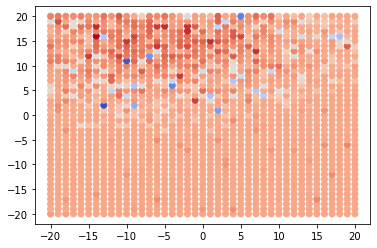

In [206]:
fig = plt.figure()
ax = plt.axes()

surf = ax.scatter(X, Y, c=Z, cmap=cm.coolwarm)


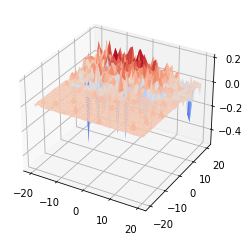

In [207]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)